# Domain model for Data Science
* includes all the major steps of reasoning for feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

# supress chained assignement warning
pd.options.mode.chained_assignment = None  # default='warn'

sns.set_style('whitegrid')

In [2]:
# import master dataset
df = pd.read_csv('../ApplicantScore_Data/Data_Master.csv')
df.head()

,Unnamed: 0,hashed_application_id,hashed_candidate_id,linkedin_available,website_available,github_available,program_short,location_short,year,session,...,terraform,threat analys,version control,wireshark,PhD,preferred_study_area_DS,preferred_study_area_SEC,preferred_study_area_DC,preferred_study_area_DE,preferred_study_area_DO
0,0,e6257449bb6b2ecb86a042b896e38361,150f404526c29501a371238154700e6d,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,1,1,1,1,0
1,1,fd8eb1133a75d9c0b334f6899cd228b9,f2b1a8bd28c2391224c002b9c80f6143,0,0,0,DS,TO,2019,C,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,1d270c12d25615282e555adb23006cc5,f8078d8d9e3259d417b4c133fda72ab5,1,0,1,AI,NY,2019,A,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,3,510845ec68d29fd85d5a62d8bf2ecfe3,36c0205f303e4744ab54464830b3ae11,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,4,18039f4fd215bfab0c6161b3094b623c,6ca10dafb8206133608a6f67a23744f4,0,0,1,DS,TO,2019,C,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0


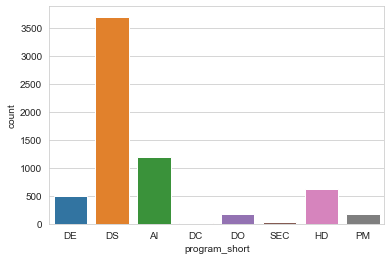

In [3]:
# how many applicants per session?
sns.countplot(df['program_short'])

---

# Work on DS only

In [4]:
DS = df[df.program_short == 'DS']
DS = DS.reset_index(drop=True)

### What are the relevant features
#### (i.e., Candidate requirements for DS) from text feature data
* education
* length of responses to questions (esp. research, side projects)
* programming languages: Java, Python, Scala, C, C++, C#, R, Perl, Fortran, MATLAB
* total number of relevant programming languages
* machine learning (mentioned in research or side projects)


# Extract potentially relevant columns for DS
* these were discussed with the program directors

In [5]:
# extract all potentially relevant features (based on discussion with program directors - domain knowledge)

# start with potential response variables
DS_columns = ['YesPlus_firm',
 'YesPlus_soft',
 'Offer',
 # sessions and locations
 'session__A',
 'session__B',
 'session__C',
 'location__BOS',
 'location__IDX',
 'location__LA',
 'location__NY',
 'location__SEA',
 'location__SV',
 'location__TO',

 # some basics
 'linkedin_available',
 'website_available',
 'github_available',
              
 # length of responses
 'research_description_char',
 'side_projects_char',
 'coursework_char',
 'industry_motivation_char',
              
 # PhD and preferred study area
 'PhD',
 'preferred_study_area_DS',
              
 # machine learning              
 'ML_cluster',
 'ML_decision tree',
 'ML_deep learning',
 'ML_generalized linear model',
 'ML_glm',
 'ML_k nearest neighb',
 'ML_linear regression',
 'ML_logistic regression',
 'ML_multiple regression',
 'ML_neural network',
 'ML_pca',
 'ML_principle component analys',
 'ML_random forest',
 'ML_regression',
 'ML_supervised learning',
 'ML_support vector machine',
 'ML_svm',
 'ML_time series',
 'ML_timeseries',
 'ML_unsupervised learning',
 'ML_all',
              
 # programming languages
 'PL_python',
 'PL_javascript',
 'PL_fortran',
 'PL_golang',
 'PL_cobol',
 'PL_java',
 'PL_wasm',
 'PL_matlab',
 'PL_solidity',
 'PL_scala',
 'PL_pytorch',
 'PL_perl',
 'PL_tensorflow',
 'PL_bash',
 'PL_sql',
 'PL_c#',
 'PL_c++',
 'PL_r',
 'PL_ruby',
 'PL_rust',
 'PL_all',
 
 # other keywords
 'aws',
 'github',
 'machine learning',
 'nlp',
 'postdoc',
 'sklearn']

In [6]:
# create clean dataset to train DS model
DS2 = DS[DS.columns & DS_columns]
DS2 = DS2[DS_columns]
DS2.head()

,YesPlus_firm,YesPlus_soft,Offer,session__A,session__B,session__C,location__BOS,location__IDX,location__LA,location__NY,...,PL_r,PL_ruby,PL_rust,PL_all,aws,github,machine learning,nlp,postdoc,sklearn
0,0,0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1.0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.750,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.250,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.250,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.375,0.0,0.0,1.0,0.0,1.0,0.0


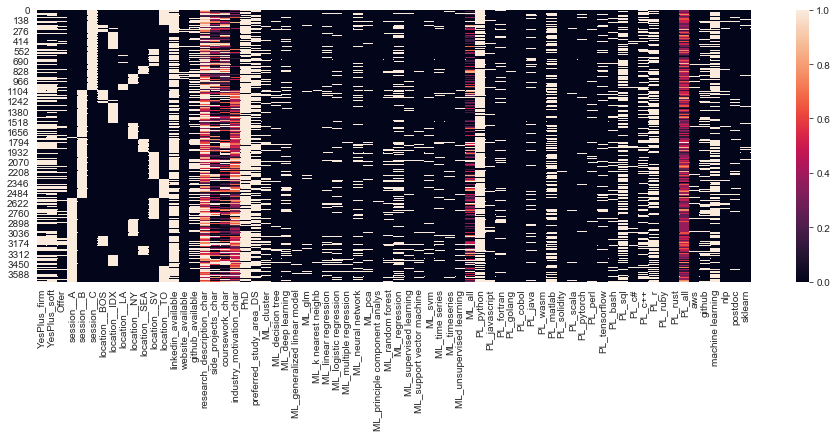

In [7]:
# check variables
plt.figure(figsize = (16,5))
sns.heatmap(DS2)

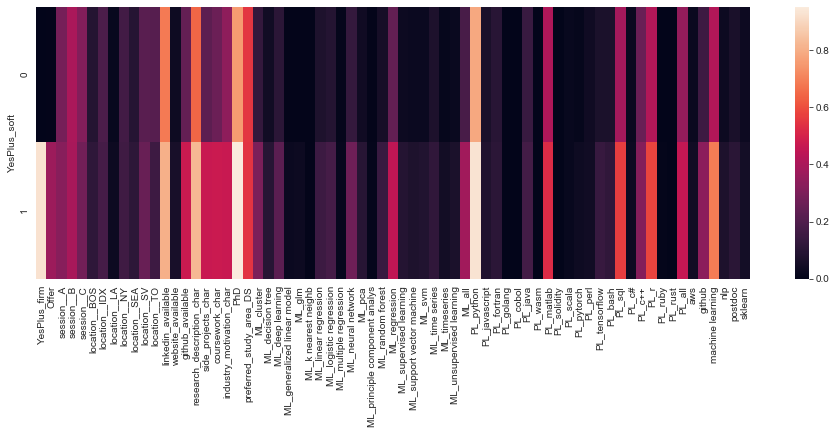

In [8]:
# examine which features have signal
plt.figure(figsize = (16,5))
sns.heatmap(DS2.groupby('YesPlus_soft').mean())

# Logistic Regression
## 1. Full model with all potentially relevant features

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [10]:
X = DS2[['session__A', 'session__B',
       'session__C', 'location__BOS', 'location__IDX', 'location__LA',
       'location__NY', 'location__SEA', 'location__SV', 'location__TO',
       'linkedin_available', 'website_available', 'github_available',
       'research_description_char', 'side_projects_char', 'coursework_char',
       'industry_motivation_char', 'PhD', 'preferred_study_area_DS',
       'ML_cluster', 'ML_decision tree', 'ML_deep learning',
       'ML_generalized linear model', 'ML_glm', 'ML_k nearest neighb',
       'ML_linear regression', 'ML_logistic regression',
       'ML_multiple regression', 'ML_neural network', 'ML_pca',
       'ML_principle component analys', 'ML_random forest', 'ML_regression',
       'ML_supervised learning', 'ML_support vector machine', 'ML_svm',
       'ML_time series', 'ML_timeseries', 'ML_unsupervised learning', 'ML_all',
       'PL_python', 'PL_javascript', 'PL_fortran', 'PL_golang', 'PL_cobol',
       'PL_java', 'PL_wasm', 'PL_matlab', 'PL_solidity', 'PL_scala',
       'PL_pytorch', 'PL_tensorflow', 'PL_bash', 'PL_sql', 'PL_c#', 'PL_c++',
       'PL_r', 'PL_ruby', 'PL_rust', 'PL_all', 'aws', 'github',
       'machine learning', 'nlp', 'postdoc', 'sklearn']]
y = DS2['YesPlus_firm']
len(set(X))

66

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       565
           1       0.72      0.72      0.72       545

    accuracy                           0.73      1110
   macro avg       0.73      0.73      0.73      1110
weighted avg       0.73      0.73      0.73      1110

[[414 151]
 [154 391]]


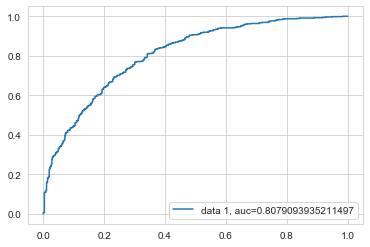

AUC: 0.81


In [11]:
## Logistic Regression Model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)


## Evaluation

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("AUC: " + str(round(auc, 2)))

Text(0.5, 0, 'Feature Importance')

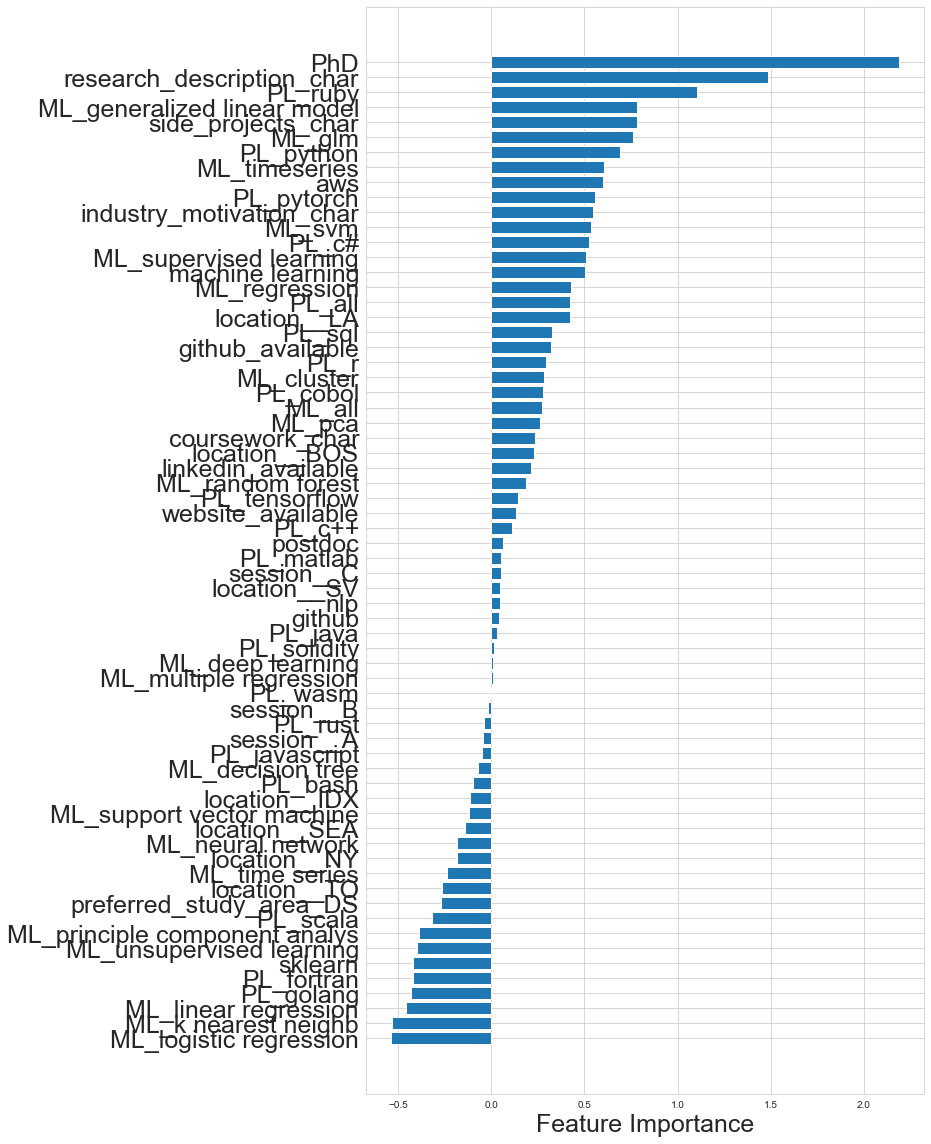

In [12]:
# examine  feature importance

from sklearn.datasets import make_classification

feature_importance = logmodel.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)

## 2. Reduce model using univariate feature selection

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       565
           1       0.74      0.71      0.73       545

    accuracy                           0.73      1110
   macro avg       0.73      0.73      0.73      1110
weighted avg       0.73      0.73      0.73      1110

[[426 139]
 [156 389]]


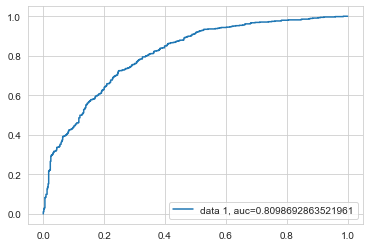

AUC: 0.81


In [13]:
## Univariate feature selection


# Create and fit selector
selector = SelectKBest(chi2, k=30)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_red = X.iloc[:,cols]

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

## Evaluation
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

# we can reduce the model down to 23 variable without effects on metrics

## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("AUC: " + str(round(auc, 2)))

Text(0.5, 0, 'Feature Importance')

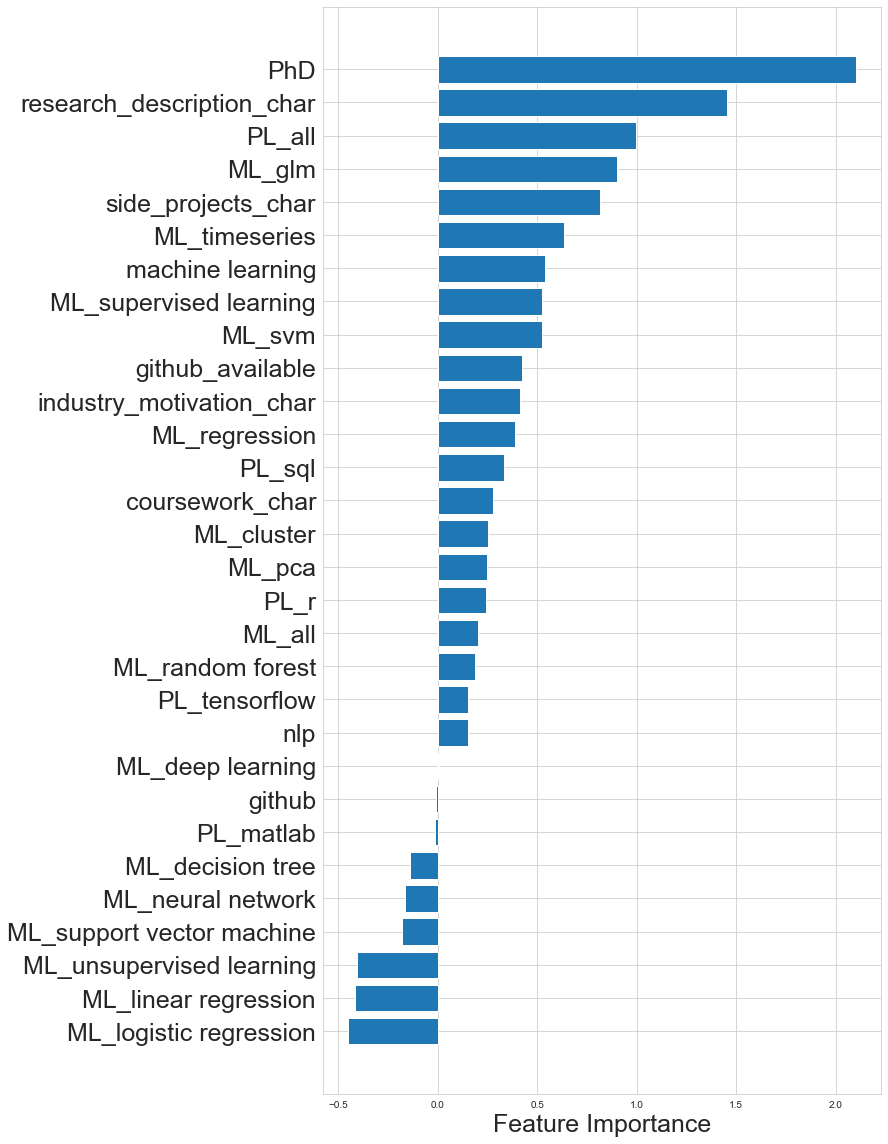

In [14]:
# examine  feature importance

feature_importance = logmodel.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_red.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)

## 3. Final model: manually remove/add some features - based on domain knowledge

* I manually improved this model by removing features with negative effect (because it does not make sense that logistic and linear regressions should decrease an applicant's score) and adding known important features (e.g, python)
* I considered their importance as well as whether exclusion makes sense in terms of my knowledge of the domain
* this improved on the model (in terms of useful insights and fit)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       565
           1       0.74      0.72      0.73       545

    accuracy                           0.74      1110
   macro avg       0.74      0.74      0.74      1110
weighted avg       0.74      0.74      0.74      1110

[[424 141]
 [150 395]]


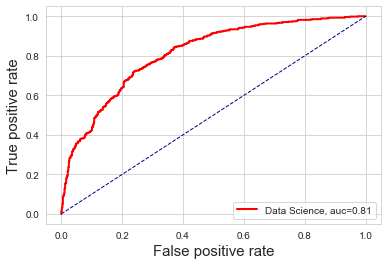

AUC: 0.81


In [30]:
# let's see if I can manually improve this model
# does not make sense

X = DS2[['PhD', 'research_description_char', 'side_projects_char', 'ML_timeseries', 'PL_python', 'PL_all', 'ML_svm', 
         'machine learning', 'github_available', 'industry_motivation_char', 'PL_r', 'PL_sql', 'coursework_char', 
         'ML_supervised learning', 'ML_cluster', 'ML_pca', 'ML_regression', 'PL_tensorflow', 'nlp']]
y = DS2['YesPlus_firm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

## Evaluation
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data Science, auc="+str(round(auc,2)), lw=2, color='red')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel("True positive rate", size=15)
plt.xlabel("False positive rate", size=15)
plt.show()
print("AUC: " + str(round(auc, 2)))

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text xticklabel objects>)

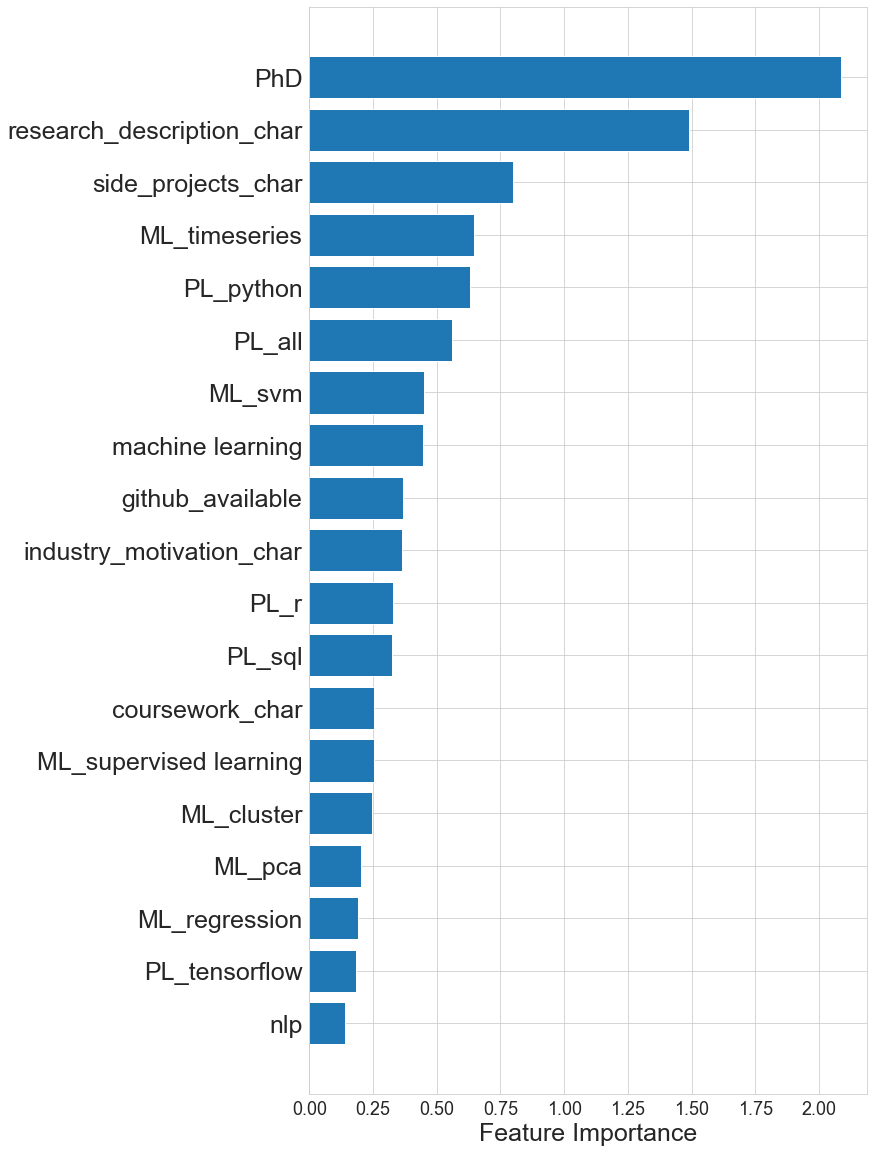

In [31]:
# examine  feature importance
sns.set_style("whitegrid")
# get importance
feature_importance = logmodel.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)
plt.xticks(fontsize = 18)

In [32]:
# save featues in list to later extract relevant columns when making predictions

DS_features = list((X.columns)[sorted_idx])
DS_features.reverse()
print(DS_features)

print('\n')
print ("Number of features in final model: ", len(np.array(X.columns)[sorted_idx]))

['PhD', 'research_description_char', 'side_projects_char', 'ML_timeseries', 'PL_python', 'PL_all', 'ML_svm', 'machine learning', 'github_available', 'industry_motivation_char', 'PL_r', 'PL_sql', 'coursework_char', 'ML_supervised learning', 'ML_cluster', 'ML_pca', 'ML_regression', 'PL_tensorflow', 'nlp']


Number of features in final model:  19


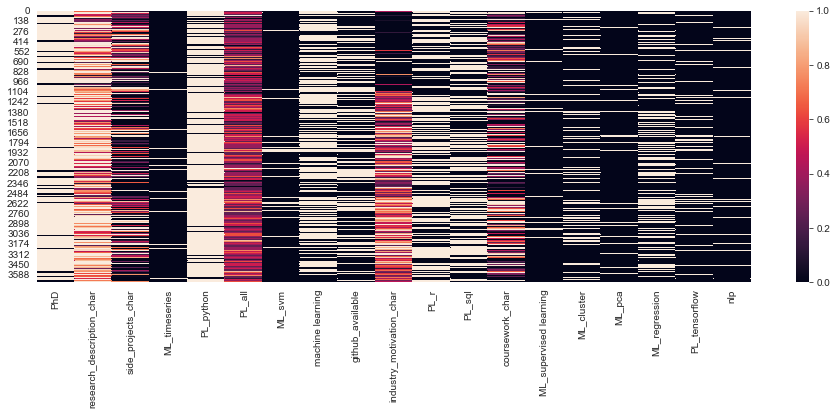

In [33]:
# visually check features to make sure there is nothing weird going on
plt.figure(figsize = (16,5))
sns.heatmap(X)
# great! everything is betw. 0 and 1

In [37]:
# correlation matrix
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,PhD,research_description_char,side_projects_char,ML_timeseries,PL_python,PL_all,ML_svm,machine learning,github_available,industry_motivation_char,PL_r,PL_sql,coursework_char,ML_supervised learning,ML_cluster,ML_pca,ML_regression,PL_tensorflow,nlp
PhD,1,0.27,0.11,0.017,0.023,0.055,0.0089,0.054,0.019,0.17,0.027,-0.13,0.084,0.02,0.075,0.04,0.069,0.0018,0.0039
research_description_char,0.27,1,0.33,0.058,0.099,0.19,0.051,0.14,0.15,0.34,0.078,0.055,0.36,0.1,0.21,0.1,0.22,0.052,0.068
side_projects_char,0.11,0.33,1,0.082,0.15,0.23,0.1,0.3,0.31,0.092,0.11,0.18,0.43,0.14,0.21,0.12,0.26,0.12,0.14
ML_timeseries,0.017,0.058,0.082,1,0.041,0.063,0.034,0.05,0.045,0.045,0.054,0.077,0.053,0.041,0.035,0.054,0.05,0.057,-0.016
PL_python,0.023,0.099,0.15,0.041,1,0.46,0.082,0.26,0.22,0.077,0.039,0.22,0.13,0.052,0.1,0.049,0.058,0.13,0.074
PL_all,0.055,0.19,0.23,0.063,0.46,1,0.12,0.27,0.25,0.12,0.31,0.48,0.23,0.093,0.19,0.085,0.1,0.3,0.066
ML_svm,0.0089,0.051,0.1,0.034,0.082,0.12,1,0.18,0.085,0.058,0.056,0.09,0.18,0.12,0.14,0.23,0.22,0.12,0.074
machine learning,0.054,0.14,0.3,0.05,0.26,0.27,0.18,1,0.23,0.057,0.075,0.19,0.34,0.16,0.17,0.11,0.22,0.19,0.15
github_available,0.019,0.15,0.31,0.045,0.22,0.25,0.085,0.23,1,0.075,0.035,0.2,0.23,0.11,0.13,0.07,0.12,0.12,0.11
industry_motivation_char,0.17,0.34,0.092,0.045,0.077,0.12,0.058,0.057,0.075,1,0.066,0.03,0.21,0.11,0.18,0.094,0.16,0.061,0.0059


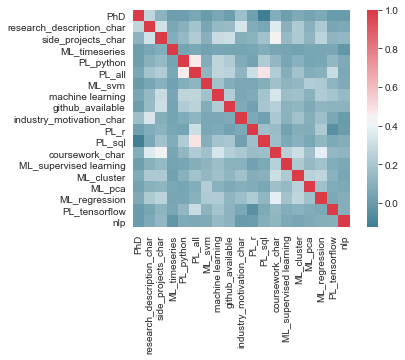

In [39]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

## Save the model and features

In [19]:
import pickle
#pickle.dump(logmodel, open('Models/DS_LGmodel.sav', 'wb'))

# save features to csv
#pd.DataFrame(X.columns, columns = ['features']).to_csv('Models/DS_features.csv')

# Validate model on Test Data using interactive plots
* the purpose of the model is to score applicants
* these scores can then be used to forward the best applications (with the highest scores) to the interview stage and thus speed up the process
* by moving the threshold that classifies applicants into the 'move forward' category, we can see how well the system works

In [20]:
# split again but keep other relevant variables (e.g., offer and location)
X = DS[DS_features]
y = DS[['YesPlus_firm', 'Offer', 'location_short']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# join test data y and X
test = pd.DataFrame(y_test).join(pd.DataFrame(X_test))

## predict model classification on test data set
test['LG_pred_05'] = logmodel.predict(X_test)

# predict probabilities (i.e., applicant score)
test['Applicant_score'] = list(logmodel.predict_proba(X_test)[:,1])

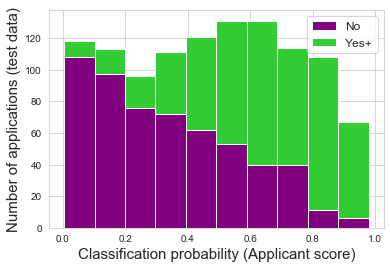

In [21]:
# compare score agaist who got an interview

sns.set_style('whitegrid')
# distribution of Data Science scores over all sections
offer = test['Applicant_score'][test['YesPlus_firm'] == 0]
reject = test['Applicant_score'][test['YesPlus_firm'] == 1]
x = [offer, reject]
label = ['No', 'Yes+']
colors = ['purple', 'limegreen']

plt.hist(x, stacked = True, label=label, color=colors, bins=10)
plt.legend(loc="upper right", fontsize =12)
plt.xlabel('Classification probability (Applicant score)', size=15)
plt.ylabel('Number of applications (test data)', size=15)
plt.show()
#test[['Applicant_score', 'Offer']].hist(histtype = 'bar', stacked = True)
#plt.hist(test[['Applicant_score', 'Offer']])

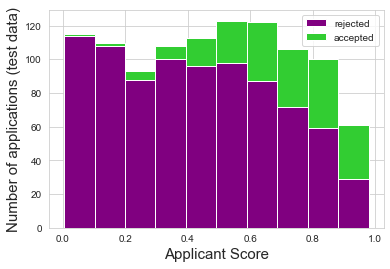

In [22]:
# compare score agaist who got an offer


sns.set_style('whitegrid')
# distribution of Data Science scores over all sections
offer = test['Applicant_score'][test['Offer'] == 0]
reject = test['Applicant_score'][test['Offer'] == 1]
x = [offer, reject]
label = ['rejected', 'accepted']

plt.hist(x, stacked = True, label=label, color=colors, bins=10)
plt.legend(loc="upper right")
plt.xlabel('Applicant Score', size=15)
plt.ylabel('Number of applications (test data)', size=15)
plt.show()


### Make interactive plots to illustrate what happens when we move the threshold for classification

In [23]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

import statistics

In [24]:
# 1. create function which will find unique values, sort them and then add the ALL item at the start

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
# the next cell comes next (same project)

In [25]:
# 2. Interactive plotting - INTERVIEW - add histogram to plot and remove scatterplot

# What threshold is best to maximize the percentage of applications that will get an offer?

output_loc = widgets.Output()
plot_output = widgets.Output()


# initiate dropdown
dropdown_loc = widgets.Dropdown(options = unique_sorted_values_plus_ALL(DS.location_short),
                               description = "Location")
slider = widgets.FloatSlider(value = 0.5, min = 0.1, max = 0.9, 
                    step=0.05, description = "Threshold",
                   orientation = 'horizontal')

output_loc.clear_output()
plot_output.clear_output()

# create observer handler to filter dataframe by location
# input argument of the handler, 'change', contains info about the changes that took place
# allows us to access the 'new' value (change.new)

def common(location, thresh):
    
    
    with plot_output:
        plot_output.clear_output()   ### VERY VERY IMPORTANT TO PUT THIS LINE EXACTLY HERE!!!!!
        if (location == ALL):
            data_new = test
        else:
            data_new = test[test.location_short == location].copy()
        
        
        # distribution of Data Science scores over all sections
        plt.figure(figsize = (6,3))
        interview = data_new['Applicant_score'][data_new['YesPlus_firm'] == 0]
        reject = data_new['Applicant_score'][data_new['YesPlus_firm'] == 1]
        x = [interview, reject]
        label = ['No', 'Yes+']
        colors = ['purple', 'limegreen']

        plt.hist(x, stacked = True, label=label, color=colors,  bins=8)
        plt.axvline(thresh, color='black', linewidth = 3)
        plt.legend(loc="upper right")
        plt.xlabel('Applicant Score', size=12)
        plt.ylabel('Number of applications (test data)', size=12)
        
        
        # plot Applicant score vs. Interview

        # create predictions for threshold (slider)
        data_new['LG_pred'] = 0
        data_new.loc[data_new['Applicant_score'] >= thresh, 'LG_pred'] = 1

        barplot = data_new.groupby(['YesPlus_firm', 'LG_pred']).size().reset_index().pivot(columns='YesPlus_firm', index='LG_pred', values=0)
        barplot.plot(kind='bar', stacked=True, figsize = (6,4), color=colors)
        plt.title('Threshold: ' + str(thresh))
        plt.xlabel('Applicant Classification', size=12)
        plt.xticks([0,1], ['No', 'Yes+'], rotation=0)
        plt.ylabel('Number of applications (test data)', size=12)
        plt.legend(['No', 'Yes+'])
        show_inline_matplotlib_plots()
        
        
        
    with output_loc:
        output_loc.clear_output()
        
        # Print total applications that were eliminated
        print('\n')
        print("Selecting applications with a score of " + str(thresh) + " or higher will")
        print('fast-track ~ ' + str(round(statistics.mean(list(data_new['LG_pred']))*100)) + "% of all applications.")
        print('\n')

        # Print precision
        true_pos = sum(list(data_new['LG_pred'][data_new['YesPlus_firm'] == 1]))
        false_pos = sum(list(data_new['LG_pred'][data_new['YesPlus_firm'] == 0]))
        print("Precision:")
        print("Of these, an estimated " + str(round(true_pos / (true_pos + false_pos) * 100)) + "%")
        print("would have been selected if processed manually.")
        
        # Print recall
        false_negs = sum(list(data_new['YesPlus_firm'])) - true_pos
        print('\n')
        print("Recall:")
        print("This cut-off captures ~ " + str(round(true_pos / (true_pos + false_negs) * 100)) + "%")
        print("of all high quality applications.")
    
        
def dropdown_loc_eventhandler(change):
    common(change.new, slider.value)
     
def slider_eventhandler(change):
    common(dropdown_loc.value, change.new)
      
dropdown_loc.observe(dropdown_loc_eventhandler, names='value')
slider.observe(slider_eventhandler, names='value')

print("Choose location (or choose ALL for all locations)")
display(dropdown_loc)
print('\n')
print("Choose ApplicantScore threshold:")
display(slider)
display(output_loc)
display(plot_output)

Choose location (or choose ALL for all locations)


Dropdown(description='Location', options=('ALL', 'BOS', 'IDX', 'LA', 'NY', 'SEA', 'SV', 'TO'), value='ALL')



Choose ApplicantScore threshold:


FloatSlider(value=0.5, description='Threshold', max=0.9, min=0.1, step=0.05)

Output()

Output()

# Applicant Score Sheet
* what are the features displayed by applicants

In [26]:
# extract columns with applicant info
DS_Score_Sheet = df[['hashed_application_id', 'hashed_candidate_id', 'plys_string']]

# extract columns with relevant applicant features
DS_applicant_feats = df[DS_features]

DS_applicant_feats2 = DS_applicant_feats.fillna(0)

# add score
DS_Score_Sheet['DS_score'] = logmodel.predict_proba(DS_applicant_feats2)[:,1]

# join with score sheet
DS_Score_Sheet = DS_Score_Sheet.join(DS_applicant_feats)

DS_Score_Sheet.head()

,hashed_application_id,hashed_candidate_id,plys_string,DS_score,PhD,research_description_char,side_projects_char,ML_timeseries,PL_python,PL_all,...,industry_motivation_char,PL_r,PL_sql,coursework_char,ML_supervised learning,ML_cluster,ML_pca,ML_regression,PL_tensorflow,nlp
0,e6257449bb6b2ecb86a042b896e38361,150f404526c29501a371238154700e6d,DE.SV-19B,0.192351,0,1.000,1.000,0.0,1.0,0.500,...,1.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,fd8eb1133a75d9c0b334f6899cd228b9,f2b1a8bd28c2391224c002b9c80f6143,DS.TO-19C,0.021129,0,0.693,0.079,0.0,0.0,0.125,...,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,1d270c12d25615282e555adb23006cc5,f8078d8d9e3259d417b4c133fda72ab5,AI.NY-19A,0.171079,0,0.978,0.000,0.0,1.0,0.250,...,0.100,1.0,0.0,0.051,0.0,0.0,0.0,1.0,0.0,1.0
3,510845ec68d29fd85d5a62d8bf2ecfe3,36c0205f303e4744ab54464830b3ae11,DE.SV-19B,0.015804,0,0.311,0.179,0.0,0.0,0.250,...,0.261,0.0,1.0,0.112,0.0,0.0,0.0,0.0,0.0,0.0
4,18039f4fd215bfab0c6161b3094b623c,6ca10dafb8206133608a6f67a23744f4,DS.TO-19C,0.775826,1,0.531,0.358,0.0,1.0,0.750,...,0.000,1.0,1.0,0.964,0.0,0.0,0.0,1.0,0.0,0.0


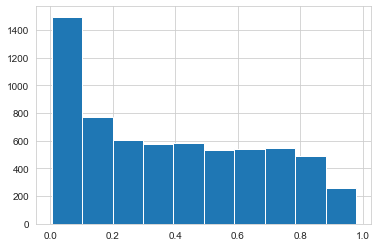

In [27]:
# distribution of Data Science scores over all sections
DS_Score_Sheet['DS_score'].hist()